## Install and import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## EDA

In [2]:
df = pd.read_csv("dataSheet\weatherAUS.csv")

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# display the data types of each column

from IPython.display import display

display(df.dtypes)


Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [4]:
df_float = df.select_dtypes(include='float64')

df_float.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [5]:
# show NaN values in the float columns, the percentage of NaN values in each column, and the total number of rows
nan_values = df_float.isnull().sum()
nan_percentage = (nan_values / len(df_float)) * 100

nan_values_percentage = pd.concat(
    [nan_values, nan_percentage], axis=1, keys=["NaN Values", "Percentage"]
)

total_rows = len(df_float)

print("Total Rows:", total_rows)
print(nan_values_percentage)

# drop row with NaN values
df_float_dropna = df_float.dropna()

# show NaN values in the float columns, the percentage of NaN values in each column, and the total number of rows
print("=== After Dropping NaN Values ===")
nan_values = df_float_dropna.isnull().sum()

nan_percentage = (nan_values / len(df_float_dropna)) * 100

nan_values_percentage = pd.concat(
    [nan_values, nan_percentage], axis=1, keys=["NaN Values", "Percentage"]
)

total_rows = len(df_float_dropna)

print("Total Rows:", total_rows)

print(nan_values_percentage)

Total Rows: 145460
               NaN Values  Percentage
MinTemp              1485    1.020899
MaxTemp              1261    0.866905
Rainfall             3261    2.241853
Evaporation         62790   43.166506
Sunshine            69835   48.009762
WindGustSpeed       10263    7.055548
WindSpeed9am         1767    1.214767
WindSpeed3pm         3062    2.105046
Humidity9am          2654    1.824557
Humidity3pm          4507    3.098446
Pressure9am         15065   10.356799
Pressure3pm         15028   10.331363
Cloud9am            55888   38.421559
Cloud3pm            59358   40.807095
Temp9am              1767    1.214767
Temp3pm              3609    2.481094
=== After Dropping NaN Values ===
Total Rows: 58236
               NaN Values  Percentage
MinTemp                 0         0.0
MaxTemp                 0         0.0
Rainfall                0         0.0
Evaporation             0         0.0
Sunshine                0         0.0
WindGustSpeed           0         0.0
WindSpeed9am     

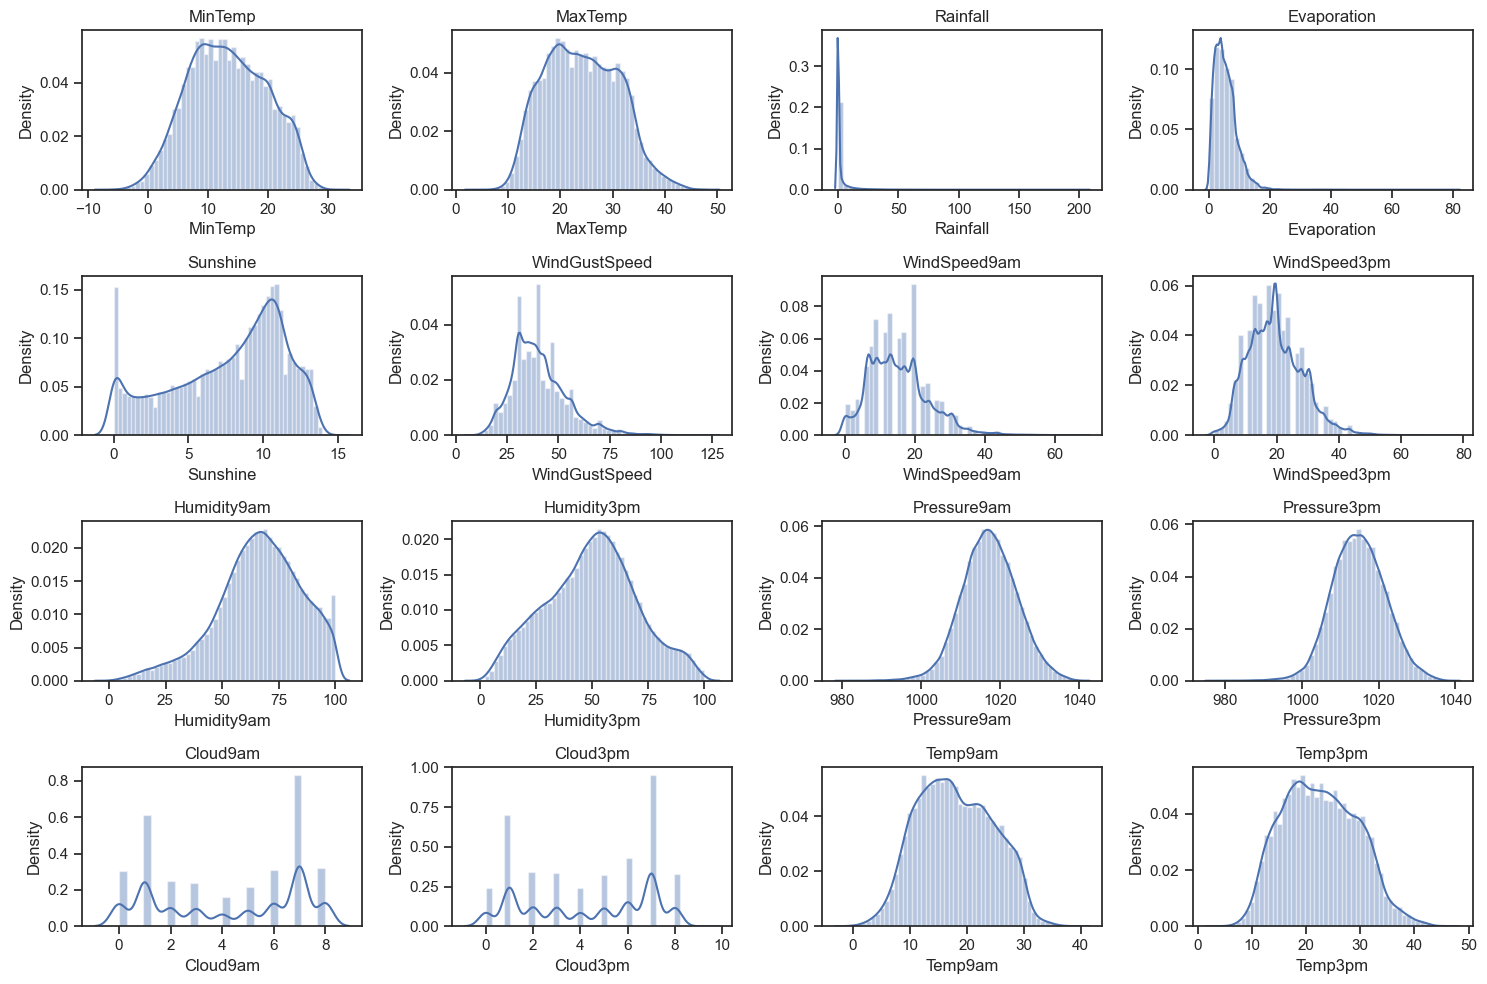

In [6]:
import seaborn as sns

# Set the style of the plots
sns.set(style="ticks")

# Create subplots for each column
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

# Flatten the axes array
axes = axes.flatten()

# Loop through each column and create a distribution plot
for i, column in enumerate(df_float_dropna.columns):
    sns.distplot(df_float_dropna[column], ax=axes[i])
    axes[i].set_title(column)

# Remove empty subplots
if len(df_float_dropna.columns) < len(axes):
    for j in range(len(df_float_dropna.columns), len(axes)):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [10]:
!pip install ydata_profiling



     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/357.9 kB ? eta -:--:--
   ------------------- -------------------- 174.1/357.9 kB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 357.9/357.9 kB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   ---------------------------------------- 296.5/296.5 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/102.7 kB ? eta -:--:--
   ---------------------------------------- 102.7/102.7 kB 6.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.6 MB 6.9 MB/s 

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_float_dropna, title="Profiling Report")
profile

ModuleNotFoundError: No module named 'ipywidgets'

In [7]:
# # BEGIN: Code to show box plot distribution for each column from df_float_dropna
# fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))

# # Flatten the axes array
# axes = axes.flatten()

# # Loop through each column and create a box plot
# for i, column in enumerate(df_float_dropna.columns):
#     sns.boxplot(data=df_float_dropna, x=column, ax=axes[i])
#     axes[i].set_title(column)

# # Remove empty subplots
# if len(df_float_dropna.columns) < len(axes):
#     for j in range(len(df_float_dropna.columns), len(axes)):
#         fig.delaxes(axes[j])

# # Adjust the spacing between subplots
# fig.tight_layout()

# # Show the plot
# plt.show()
# # END: Code to show box plot distribution for each column from df_float_dropna


In [8]:
# num_cols_count = len(df_float_dropna)
# n_rows = num_cols_count

# fig, axs = plt.subplots(n_rows, 2, figsize=(14, n_rows * 5))

# for idx, col in enumerate(df_float_dropna):

#     # Plot histogram
#     sns.histplot(
#         data=df, x=col, kde=True, ax=axs[idx, 0], color="cornflowerblue", bins=30
#     )
#     axs[idx, 0].set_title(f"Histogram of {col}")
#     axs[idx, 0].axvline(df[col].mean(), color="red", linestyle="--")  # mean
#     axs[idx, 0].axvline(df[col].median(), color="green", linestyle="-")  # median
#     axs[idx, 0].legend({"Mean": df[col].mean(), "Median": df[col].median()})

#     # Plot boxplot
#     sns.boxplot(data=df, x=col, ax=axs[idx, 1], color="lightcoral")
#     axs[idx, 1].set_title(f"Boxplot of {col}")

# plt.tight_layout()
# plt.show()